In [1]:
import numpy as np
import pandas as pd
import os
from pprint import pprint
from collections import defaultdict
import seq_helper as seqh
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import squareform, pdist
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)

from sklearn.decomposition import PCA
from matplotlib.cm import spectral
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})



In [2]:
F_path_name = ''.join(['./matrix_data/','F.csv'])
Q_path_name = ''.join(['./matrix_data/','Q.csv'])
L_path_name = ''.join(['./matrix_data/','L.csv'])

F = np.array(pd.read_csv(F_path_name,sep=",", header = None))
Q = np.array(pd.read_csv(Q_path_name,sep=",", header = None))
L = np.array(pd.read_csv(L_path_name,sep=",", header = None))
L = np.reshape(L.astype(int),(-1))

F.shape, Q.shape, L.shape

((359, 256), (359, 35), (359,))

(359, 35) (359, 2) (2, 35)


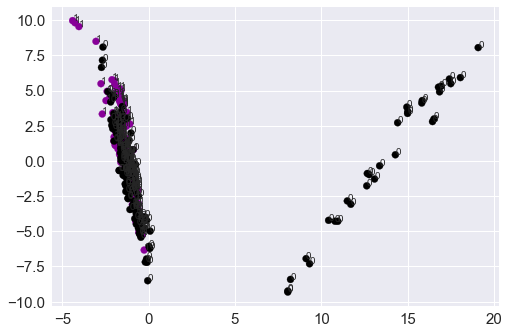

In [3]:
# PCA
x = Q

mean_x = np.mean(x, axis=0)
std_x = np.std(x, axis=0)
x_standard = (x-mean_x)/std_x
pca = PCA(n_components=2).fit(x_standard)
projected_x = pca.transform(x_standard)
print(x_standard.shape, projected_x.shape, pca.components_.shape)

#for i in label draw
fig, ax = plt.subplots()

c=[spectral(float(i) /10) for i in L]
ax.scatter(projected_x[:,0],projected_x[:,1], c=c)
txt = [str(i) for i in L] #[label_text_dict[i] for i in label]
for i in range(x.shape[0]):
    ax.annotate(txt[i], (projected_x[i,0],projected_x[i,1]),size=10)

plt.show()

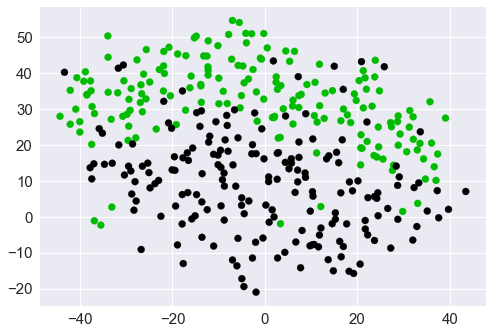

In [14]:
# TSNE
nc = 2
tsne = TSNE(n_components=nc, perplexity=30.0, random_state=0)
F_reduced = tsne.fit_transform(F)

#for i in label draw
fig, ax = plt.subplots()

c=[spectral(float(i) /nc) for i in L]
ax.scatter(F_reduced[:,0],F_reduced[:,1], c=c)
#txt = [str(i) for i in L] #[label_text_dict[i] for i in label]
#for i in range(x.shape[0]):
#    ax.annotate(txt[i], (F_reduce[i,0],F_reduce[i,1]),size=10)

plt.show()

In [15]:
def _joint_probabilities_constant_sigma(D, sigma):
    P = np.exp(-D**2/2 * sigma**2)
    P /= np.sum(P, axis=1)
    return P

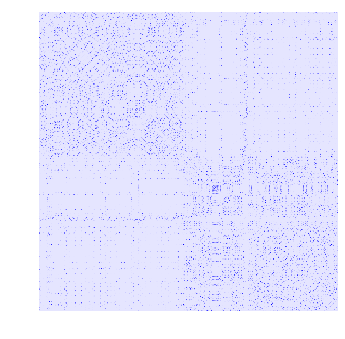

In [16]:
D_map = pairwise_distances(F_reduced, squared=True)
P_map_binary = _joint_probabilities(D_map, 30., False)

P_map = squareform(P_map_binary)
#P_map = _joint_probabilities_constant_sigma(D_map, 0.01)

pal = sns.light_palette("blue", as_cmap=True)

plt.imshow(P_map, interpolation='none', cmap=pal)
plt.axis('off')
plt.show()